In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='w9CmC7TjKRr4zuefGTX780-oU2SYQM7vzSQWOqunQnDc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-ewdibkapcqggg2'
object_key = 'Admission_Predict (1) (2).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
corr_matrix=dataset.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


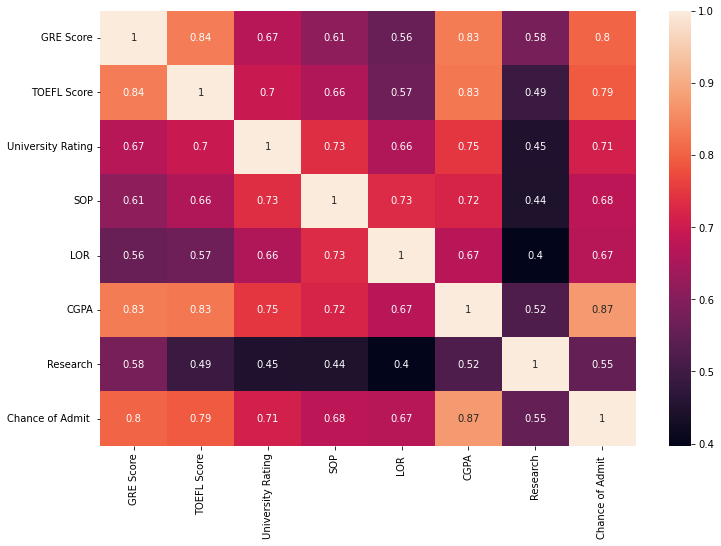

In [6]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

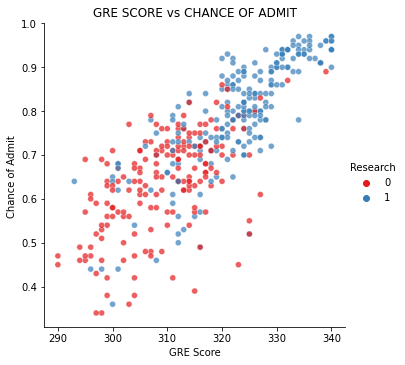

In [7]:
sns.relplot(x="GRE Score", y="Chance of Admit ", data=dataset, hue="Research",palette="Set1", alpha=0.7)
plt.title("GRE SCORE vs CHANCE OF ADMIT")
plt.show()

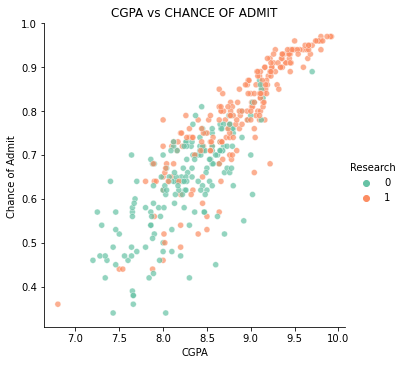

In [8]:
sns.relplot(data=dataset,x="CGPA",y="Chance of Admit ",hue="Research",palette="Set2",alpha=0.7)
plt.title("CGPA vs CHANCE OF ADMIT")
plt.show()

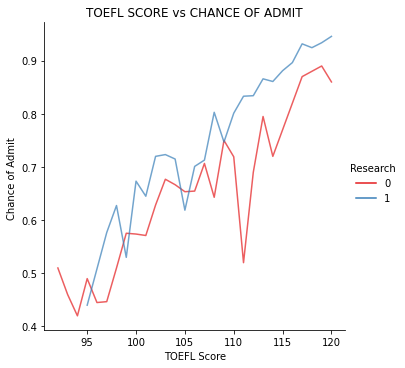

In [9]:
sns.relplot(data=dataset,x="TOEFL Score",y="Chance of Admit ",hue="Research",palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL SCORE vs CHANCE OF ADMIT")
plt.show()

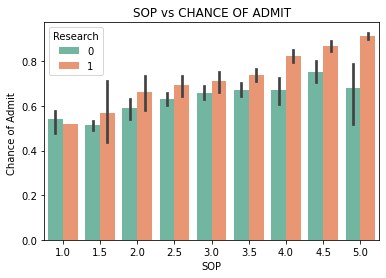

In [10]:
sns.barplot(data=dataset,x="SOP",y="Chance of Admit ",palette="Set2",hue="Research")
plt.title("SOP vs CHANCE OF ADMIT")
plt.show()

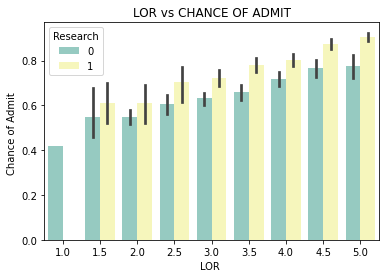

In [11]:
sns.barplot(data=dataset,x="LOR ",y="Chance of Admit ",palette="Set3",hue="Research")
plt.title("LOR vs CHANCE OF ADMIT")
plt.show()

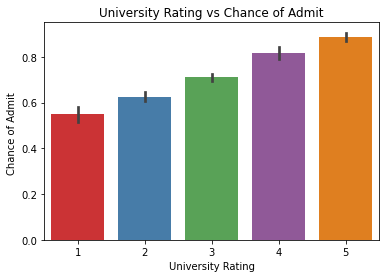

In [12]:
sns.barplot(data=dataset,x="University Rating",y="Chance of Admit ",palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [14]:
x=dataset[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA","Research"]]
y=dataset["Chance of Admit "].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 

In [15]:
multiple_lin_reg=LinearRegression()
multiple_lin_reg.fit(x_train,y_train)
y_pred_mlr = multiple_lin_reg.predict(x_test)
r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("MULTIPLE LINEAR REGRESSION SCORE={:.3f}".format(r2_score_mlr))


MULTIPLE LINEAR REGRESSION SCORE=0.821


In [16]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train,y_train) 
y_pred_tree=tree_reg.predict(x_test)
r2_score_tree=r2_score(y_test,y_pred_tree)
r2_score_tree=r2_score(y_test,y_pred_tree)
print("DECISION TREE REGRESSION SCORE={:.3f}".format(r2_score_tree))


DECISION TREE REGRESSION SCORE=0.668


In [24]:
ran_for_reg=RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)
y_pred_rfr=ran_for_reg.predict(x_test)
r2_score_rfr=r2_score(y_test,y_pred_rfr)
print("RANDOM FOREST REGRESSION SCORE={:.3f}".format(r2_score_rfr))


RANDOM FOREST REGRESSION SCORE=0.807


In [17]:
!pip install ibm_watson_machine_learning

In [18]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"vYcMJSsetjmAszl1wlvzsw2ogISgi3FABAwZAvYBj3Np"
}
client=APIClient(wml_credentials)


In [19]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])


In [20]:
space_uid=guid_from_space_name(client,'universityadmit')
print('Space UID = '+ space_uid)


Space UID = e8f72d35-ec18-4e49-8c56-1f5cec1ca706


In [21]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [23]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [24]:
model_details=client.repository.store_model(model=multiple_lin_reg,meta_props={
    client.repository.ModelMetaNames.NAME:"UNIVERSITYADMIT",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}
                                           )
model_id=client.repository.get_model_id(model_details)

In [25]:
model_id

'71765547-1cee-4ce5-86be-b8590f112f3b'

In [26]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [27]:
multiple_lin_reg.predict(x_train)

array([[0.74604196],
       [0.73901061],
       [0.99499641],
       [0.71465428],
       [0.58666289],
       [0.70570088],
       [0.79635618],
       [0.72390065],
       [0.91430317],
       [0.65782685],
       [0.60293691],
       [0.84357917],
       [0.49457813],
       [0.72066904],
       [0.61590143],
       [0.63303675],
       [0.73458027],
       [0.77284896],
       [0.54224384],
       [0.7740777 ],
       [0.67388358],
       [0.68770413],
       [0.71751013],
       [0.79218791],
       [0.74689676],
       [0.60135562],
       [0.6550291 ],
       [0.65024192],
       [0.64937148],
       [0.61847543],
       [0.71837168],
       [0.62572932],
       [0.56180503],
       [0.58932197],
       [0.82917531],
       [0.60765804],
       [0.45309083],
       [0.88506537],
       [0.772133  ],
       [0.81857796],
       [0.62930747],
       [0.705755  ],
       [0.6604701 ],
       [0.44720981],
       [0.9565852 ],
       [0.79082941],
       [0.7826623 ],
       [0.656

In [1]:
import requests
import json

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = ""
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]], "values": [[320,100,2,3,4,8.23,0]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/a5037cc3-64cd-410e-9acc-2bd9da728164/predictions?version=2022-11-17',
json=payload_scoring,headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())


Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[[0.6588228761439119]]]}]}
